## 신경망 학습해보기

### 나선형 데이터셋의 다중클래스 구분을 신경망으로 해결하기

In [1]:
# 데이터 불러오기 및 생성하기

import sys

sys.path.append('C:/Users/myunghoon_k/OneDrive - 서울시립대학교/bitamin/dl_nlp_study/deep-learning-from-scratch-2-master')

from dataset import spiral
import matplotlib.pyplot as plt
%matplotlib inline

x,t = spiral.load_data()

print('x',  x.shape) #피쳐
print('t', t.shape) #타겟

x (300, 2)
t (300, 3)


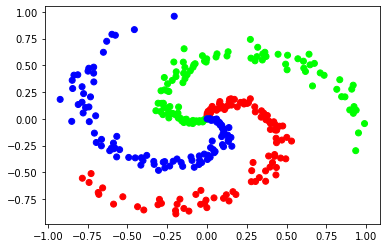

In [2]:
plt.scatter(x = x[:,0], y = x[:,1], color = t)
    #선형적으로 클래스 구분이 불가능한 데이터
    #신경망을 통해 다중클래스 구분을 시도

In [3]:
#신경망 계층 생성
#계층 생성 전 mh_layers.py, mh_functions.py를 먼저 생성하고 작업을 진행함

from mh_common.mh_layers import Affine, Sigmoid, SoftmaxWithLoss
import numpy as np

class TwoLayerNet: #가중치를 2개 가지는 DNN 생성 (은닉층이 1개)
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size #입력, 은닉, 출력층의 차원 결정

        #W, b 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        #계층 생성
        self.layers = [
            Affine(W1, b1), #입력층 -> 은닉층으로의 순전파
            Sigmoid(), #은닉층 내 활성함수
            Affine(W2, b2) #은닉층 0> 출력층으로의 순전파
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        #학습 과정에서 생성되는 W(가중치), d(기울기)를 self.params, self.grads에 담는다
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x): #순전파를 수행
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x) #순전파로 선형변환된 행렬
        loss = self.loss_layer.forward(score, t) #선형변환된 행렬을 바탕으로 손실값 생성
        return loss #크로스 엔트로피 손실값을 반환

    def backward(self, dout = 1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers): 
            #역전파는 최상층부터 시작해야하므로 최상층에서 최하위 층으로 역전파를 진행
            dout = layer.backward(dout)
        return dout #최종 dl / dx값을 반환


In [5]:
#생성된 2층 네트워크 모델을 바탕으로 spiral 데이터셋 분류 학습해보기
import sys
import numpy as np
from mh_common.mh_optimizer import SGD
from mh_common.mh_two_layer_net import TwoLayerNet

sys.path.append('C:/Users/myunghoon_k/OneDrive - 서울시립대학교/bitamin/dl_nlp_study/deep-learning-from-scratch-2-master')

from dataset import spiral

#하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10 
learning_rate = 1.0

#spiral 데이터셋, 모델, optimizer 생성
x, t= spiral.load_data()
model = TwoLayerNet(input_size = x.shape[1], hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr = learning_rate)

#학습에 사용할 변수 생성
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

#학습 수행
for epoch in range(max_epoch): #300번의 학습을 수행
    idx = np.random.permutation(data_size) #랜덤하게 데이터를 뒤섞는다
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters): #미니배치 학습으로 300개의 데이터를 30개씩 10번 수행
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        #매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        #학습 경과 출력
        if (iters + 1) %10 == 0: 
            #10번 수행때마다 학습경과를 출력
            #즉 한 epoch내미니배치가 모두 끝날때마다 출력
            avg_loss = total_loss / loss_count
            print('| epoch %d | mini-batch %d / %d | avg_loss %.2f'
            % (epoch +1, iters +1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| epoch 1 | mini-batch 10 / 10 | avg_loss 1.13
| epoch 2 | mini-batch 10 / 10 | avg_loss 1.13
| epoch 3 | mini-batch 10 / 10 | avg_loss 1.12
| epoch 4 | mini-batch 10 / 10 | avg_loss 1.12
| epoch 5 | mini-batch 10 / 10 | avg_loss 1.11
| epoch 6 | mini-batch 10 / 10 | avg_loss 1.14
| epoch 7 | mini-batch 10 / 10 | avg_loss 1.16
| epoch 8 | mini-batch 10 / 10 | avg_loss 1.11
| epoch 9 | mini-batch 10 / 10 | avg_loss 1.12
| epoch 10 | mini-batch 10 / 10 | avg_loss 1.13
| epoch 11 | mini-batch 10 / 10 | avg_loss 1.12
| epoch 12 | mini-batch 10 / 10 | avg_loss 1.11
| epoch 13 | mini-batch 10 / 10 | avg_loss 1.09
| epoch 14 | mini-batch 10 / 10 | avg_loss 1.08
| epoch 15 | mini-batch 10 / 10 | avg_loss 1.04
| epoch 16 | mini-batch 10 / 10 | avg_loss 1.03
| epoch 17 | mini-batch 10 / 10 | avg_loss 0.96
| epoch 18 | mini-batch 10 / 10 | avg_loss 0.92
| epoch 19 | mini-batch 10 / 10 | avg_loss 0.92
| epoch 20 | mini-batch 10 / 10 | avg_loss 0.87
| epoch 21 | mini-batch 10 / 10 | avg_loss 0.85
|

| epoch 276 | mini-batch 10 / 10 | avg_loss 0.12
| epoch 277 | mini-batch 10 / 10 | avg_loss 0.12
| epoch 278 | mini-batch 10 / 10 | avg_loss 0.11
| epoch 279 | mini-batch 10 / 10 | avg_loss 0.11
| epoch 280 | mini-batch 10 / 10 | avg_loss 0.11
| epoch 281 | mini-batch 10 / 10 | avg_loss 0.11
| epoch 282 | mini-batch 10 / 10 | avg_loss 0.12
| epoch 283 | mini-batch 10 / 10 | avg_loss 0.11
| epoch 284 | mini-batch 10 / 10 | avg_loss 0.11
| epoch 285 | mini-batch 10 / 10 | avg_loss 0.11
| epoch 286 | mini-batch 10 / 10 | avg_loss 0.11
| epoch 287 | mini-batch 10 / 10 | avg_loss 0.11
| epoch 288 | mini-batch 10 / 10 | avg_loss 0.12
| epoch 289 | mini-batch 10 / 10 | avg_loss 0.11
| epoch 290 | mini-batch 10 / 10 | avg_loss 0.11
| epoch 291 | mini-batch 10 / 10 | avg_loss 0.11
| epoch 292 | mini-batch 10 / 10 | avg_loss 0.11
| epoch 293 | mini-batch 10 / 10 | avg_loss 0.11
| epoch 294 | mini-batch 10 / 10 | avg_loss 0.11
| epoch 295 | mini-batch 10 / 10 | avg_loss 0.12
| epoch 296 | mini-b

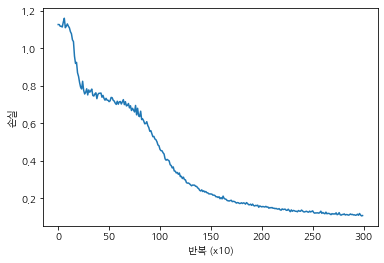

In [7]:
#학습 결과 plot
plt.rc('font', family='NanumGothic') #한글폰트 출력
plt.plot(np.arange(len(loss_list)), loss_list, label = 'train')
    #x는 epoch 훈련 횟수를 나타내고, y는 훈련횟수별 평균 손실값을 나타냄
plt.xlabel('반복 (x10)')
plt.ylabel('손실')
plt.show()

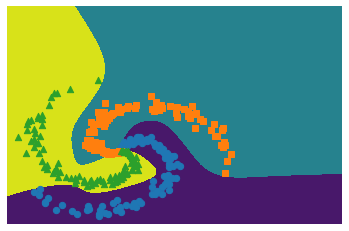

In [16]:
#네트워크가 학습한 경계영역 plot
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis = 1)
Z = predict_cls.reshape(xx.shape) #xx, yy로 찍힌 점들에 대한 예측 class를 담은 값
plt.contourf(xx, yy, Z) #뒤 배경에 색깔을 칠하는 시각화 수행
    #해당 영역의 데이터들은 동일 클래스로 인식됨
plt.axis('off')

x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 's', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s = 40, marker = markers[i])
plt.show()

| epoch 1 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.10
| epoch 2 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.12
| epoch 3 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.13
| epoch 4 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.12
| epoch 5 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.12
| epoch 6 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.10
| epoch 7 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.14
| epoch 8 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.16
| epoch 9 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.11
| epoch 10 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.12
| epoch 11 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.12
| epoch 12 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.12
| epoch 13 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.10
| epoch 14 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.09
| epoch 15 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.08
| epoch 16 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.04
| epoch 17 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 1.03
| epoch 18 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.94
|

| epoch 279 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.11
| epoch 280 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.10
| epoch 281 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.12
| epoch 282 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.11
| epoch 283 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.12
| epoch 284 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.11
| epoch 285 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.11
| epoch 286 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.12
| epoch 287 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.11
| epoch 288 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.11
| epoch 289 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.12
| epoch 290 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.11
| epoch 291 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.11
| epoch 292 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.11
| epoch 293 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.11
| epoch 294 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.11
| epoch 295 | mini-batch 1 / 10 | 시간 0[s] |avg_loss 0.11
| epoch 296 | mini-batch 1 / 10

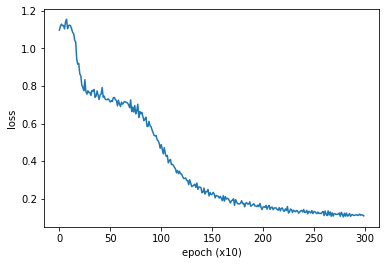

In [1]:
#Trainer 클래스를 생성하여 손쉬운 코드 작성하기
#mh_trainer는 vscode를 이용하여 작성함

import sys
from mh_common.mh_optimizer import SGD
from mh_common.mh_trainer import Trainer
from mh_common.mh_two_layer_net import TwoLayerNet

sys.path.append('C:/Users/myunghoon_k/OneDrive - 서울시립대학교/bitamin/dl_nlp_study/deep-learning-from-scratch-2-master')
from dataset import spiral

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x,t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size = hidden_size, output_size = 3)
optimizer = SGD(lr = learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval = 10)
trainer.plot()

## 신경망 학습 구현을 위한 코드 작성과정 정리

**책의 구현 규칙을 다시 상기**    
- 모든 클래스에는 forward() backward() 메서드가 있어야 한다
- 클래스 안에는 params, grads가 인스턴스 변수로 생성되어 있다 
- 인스턴스 변수는 self. 로 생성되는 변수들을 말한다. 이 변수들은 클래스안에서 어떤 함수나 메서드에서 공유될 수 있다

### TwoLayerNet
- 순전파 forward, 역전파 backward 기능 구현을 위함
- 순전파 역전파 과정에서 생성되는 prams, grads라는 객체를 생성
- 인자로 학습할 데이터의 차원수, 은닉층의 차원수, 출력층의 차원수를 입력

### SGD
- 가중치 업데이트를 위해 사용하는 클래스
- 미니배치 방식으로 역전파된 가중치들의 가중치를 업데이트 하는 방식은 dout - dout x learing_rate

### Trainer
- 학습할 모델과 가중치 업데이트를 해주는 클래스를 인자로 입력
- 미니배치 방식의 학습 및 모델평가 기능을 제공
- fit 메서드의 인자로는 데이터, 정답데이터, 전체 훈련 횟수, 미니 배치 사이즈, 최대 기울기 정규화 값, eval_interval = epoch // batch_size값을 입력한다
- fit 메서드 안에서는 x와 t를 model 클래스 안에 넣어서 순전파, 역전파로 학습을 시킨다
- 학습중 발생한 손실을 주기적으로 측정하여 진행상황을 알려주는 코드도 추가한다
- plot 메서드는 fit메서드를 통해 생성된 loss를 이용하여 epoch 증가에 따른 loss의 추이를 시각화해주는 함수가 작성되어 있다

In [2]:
#계산 고속화

#비트 정밀도
#기본적으로 numpy의 수는 64비트 데이터타입임
import numpy as np

a = np.random.randn(3)
a.dtype

dtype('float64')

- 비트 정밀도는 메모리 크기와 관련이 있다
- 즉 비트 정밀도가 높을수록 메모리를 많이 차지해서 메모리 사용 효율이 상대적으로 떨어질 수 있다
- 따라서 비트 정밀도를 낮춰서 메모리 사용 효율을 늘릴 수 있고
- 메모리 사용 효율이 높아지면 학습 속도도 높아질 수 있다
    - 다만 비트 정밀도를 낮춰도 **오류가 없거나 적을 때** 사용이 가능하다

In [4]:
#32비트 정밀도로 변환
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [5]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')